# 实例——解析法实现一元线性回归

### 导入库，设置字体  加载样本数据


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
x= tf.constant([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
y= tf.constant([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

### 学习模型——计算w,b

In [3]:
meanX= tf.reduce_mean(x)#求均值
meanY= tf.reduce_mean(y)

sumXY= tf.reduce_sum((x-meanX)*(y-meanY))#求分子
sumX= tf.reduce_sum((x-meanX)*(x-meanX))#求分母

w= sumXY/sumX
b= meanY-w*meanX

In [4]:
print("权值w=",w.numpy(),"\n偏置值b=",b.numpy())
print("线性模型：y=",w.numpy(),"*x+",b.numpy())

权值w= 0.8945604 
偏置值b= 5.4108505
线性模型：y= 0.8945604 *x+ 5.4108505


### 预测房价

In [5]:
x_test= np.array([128.15,45.00,141.43,106.27,99.00,53.84,85.36,70.00])
y_pred= (w*x_test+b).numpy()

In [6]:
print("面积\t估计房价")
n= len(x_test)
for i in range(n):
    print(x_test[i],"\t",round(y_pred[i],2))#round函数：四舍五入函数

面积	估计房价
128.15 	 120.05
45.0 	 45.67
141.43 	 131.93
106.27 	 100.48
99.0 	 93.97
53.84 	 53.57
85.36 	 81.77
70.0 	 68.03


### 数据和模型可视化

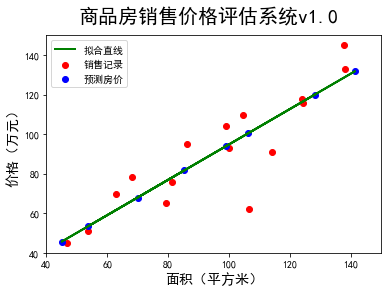

In [7]:
plt.figure()

plt.scatter(x,y,color="red",label="销售记录")#散点图，红点
plt.scatter(x_test,y_pred,color="blue",label="预测房价")#单点图，蓝点
plt.plot(x_test,y_pred,color="green",label="拟合直线",linewidth=2)#直线图

plt.xlabel("面积（平方米）",fontsize=14)#横坐标
plt.ylabel("价格（万元）",fontsize=14)#纵坐标

plt.xlim((40,150))#横轴范围
plt.ylim((40,150))#纵轴范围

plt.suptitle("商品房销售价格评估系统v1.0",fontsize=20)#标题

plt.legend(loc="upper left")#设置图例位置
plt.show()